In [1]:
import h5py
from data_analysis_codes import param
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import LinData
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from data_analysis_codes.tools import GetVars_Plot2d as GVar

In [2]:
sim32 = param.pflrw_d3e2_L1821_t1_N32_LCDM()
sim64 = param.pflrw_d3e2_L1821_t1_N64_LCDM()
sim128 = param.pflrw_d3e2_L1821_t1_N128_LCDM()
it32 = np.arange(0, 12200, 100)
it64 = np.arange(0, 24300, 200)
it128 = np.arange(0, 48500, 400)
Lin32 = LinData.LinData_Class(sim32, '/home/robynm/simulations/'+sim32.sim_name+'/')
Lin64 = LinData.LinData_Class(sim64, '/home/robynm/simulations/'+sim64.sim_name+'/')
Lin128 = LinData.LinData_Class(sim128, '/home/robynm/simulations/'+sim128.sim_name+'/')

 read time file
 read time file
 read time file


In [3]:
def abreal(a):
    return abs(np.real(a))
def abim(a):
    return abs(np.imag(a))

In [4]:
def get_conditions(H, invar_dict):
    iH2 = 1/(H*H)
    E2 = np.array(invar_dict['E2'])
    B2 = np.array(invar_dict['B2'])
    M = np.array(invar_dict['M'])
    I = np.array(invar_dict['I'])
    J = np.array(invar_dict['J'])
    Scrit = I*I*I-27*J*J
    
    dE = (abs(E2)**(1/2))*iH2
    dB = (abs(B2)**(1/2))*iH2
    dM = (abs(M)**(1/2))*iH2
    dEB = (abs(E2 - B2)**(1/2))*iH2
    
    dI = I**(1/2)
    dJ = J**(1/3)
    dScrit = Scrit**(1/6)
    dLS = np.array(invar_dict['LS'])**(1/2)
    dK = np.array(invar_dict['K'])**(1/3)
    dN = np.array(invar_dict['N'])**(1/4)
    
    dIr = abreal(dI)*iH2
    dIc = abim(dI)*iH2
    dJr = abreal(dJ)*iH2
    dJc = abim(dJ)*iH2
    dScritr = abreal(dScrit)*iH2
    dScritc = abim(dScrit)*iH2
    dLSr = abreal(dLS)*iH2
    dLSc = abim(dLS)*iH2
    dKr = abreal(dK)*iH2
    dKc = abim(dK)*iH2
    dNr = abreal(dN)*iH2
    dNc = abim(dN)*iH2
    
    return dE, dB, dEB, dM, dIr, dIc, dJr, dJc, dScritr, dScritc, dLSr, dLSc, dKr, dKc, dNr, dNc

In [5]:
def interpolate(f):
    f_save = np.zeros((np.shape(f)[0]*2, np.shape(f)[1]*2))
    for i in range(np.shape(f)[0]):
        if i==np.shape(f)[0]-1:
            i = -1
        for j in range(np.shape(f)[1]):
            if j==np.shape(f)[0]-1:
                j = -1
            #print(i, j)
            f_save[i*2, j*2] = np.sum([f[i,j]*4/9, f[i-1,j]*2/9, f[i,j-1]*2/9, f[i-1,j-1]*1/9])
            f_save[i*2, j*2+1] = np.sum([f[i,j]*4/9, f[i-1,j]*2/9, f[i,j+1]*2/9, f[i-1,j+1]*1/9])
            f_save[i*2+1, j*2] = np.sum([f[i,j]*4/9, f[i+1,j]*2/9, f[i,j-1]*2/9, f[i+1,j-1]*1/9])
            f_save[i*2+1, j*2+1] = np.sum([f[i,j]*4/9, f[i+1,j]*2/9, f[i,j+1]*2/9, f[i+1,j+1]*1/9])
    return f_save

def get_error(data32, data64, data128, Scrit=False):
    data32 = interpolate(interpolate(data32))
    data64 = interpolate(data64)
    convergence = abs(data32-data64)/abs(data64-data128)
    error = abs(data64-data128)/abs(convergence-1)
    for i in range(np.shape(data128)[0]):
        for j in range(np.shape(data128)[1]):
            if error[i,j]>abs(data32[i,j]-data64[i,j]) or error[i,j]>abs(data64[i,j]-data128[i,j]):
                error[i,j] = np.max([abs(data32[i,j]-data64[i,j]), abs(data64[i,j]-data128[i,j])])
            
    return error

In [6]:
def Petrov_determination(it):
    FDorder = '6'
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    dE32, dB32, dEB32, dM32, dIr32, dIc32, dJr32, dJc32, dScritr32, dScritc32, dLSr32, dLSc32, dKr32, dKc32, dNr32, dNc32 = get_conditions(H, invar_dict32)
    
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    dE64, dB64, dEB64, dM64, dIr64, dIc64, dJr64, dJc64, dScritr64, dScritc64, dLSr64, dLSc64, dKr64, dKc64, dNr64, dNc64 = get_conditions(H, invar_dict64)
    
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    dE128, dB128, dEB128, dM128, dIr128, dIc128, dJr128, dJc128, dScritr128, dScritc128, dLSr128, dLSc128, dKr128, dKc128, dNr128, dNc128 = get_conditions(H, invar_dict128)
    
    dEe = get_error(dE32, dE64, dE128)
    dBe = get_error(dB32, dB64, dB128)
    dMe = get_error(dM32, dM64, dM128)
    dEBe = get_error(dEB32, dEB64, dEB128)
    dIre = get_error(dIr32, dIr64, dIr128)
    dIce = get_error(dIc32, dIc64, dIc128)
    dJre = get_error(dJr32, dJr64, dJr128)
    dJce = get_error(dJc32, dJc64, dJc128)
    dScritre = get_error(dScritr32, dScritr64, dScritr128, Scrit=True)
    dScritce = get_error(dScritc32, dScritc64, dScritc128, Scrit=True)
    dLSre = get_error(dLSr32, dLSr64, dLSr128)
    dLSce = get_error(dLSc32, dLSc64, dLSc128)
    dKre = get_error(dKr32, dKr64, dKr128)
    dKce = get_error(dKc32, dKc64, dKc128)
    dNre = get_error(dNr32, dNr64, dNr128)
    dNce = get_error(dNc32, dNc64, dNc128)
    
    Petrov_class = np.zeros(np.shape(dE128))
    for i in range(Lin128.N):
        for j in range(Lin128.N):
            cutoff = 0.2#sim128.Amp_pert
            
            Scritreq0 = dScritr128[i,j]<cutoff and (dScritr128[i,j]>dScritre[i,j] or cutoff>dScritre[i,j])
            Scritceq0 = dScritc128[i,j]<cutoff and (dScritc128[i,j]>dScritce[i,j] or cutoff>dScritce[i,j])
            if Scritreq0:# and Scritceq0:
                cutoff = 0.05
                Ireq0 = dIr128[i,j]<cutoff and (dIr128[i,j]>dIre[i,j] or cutoff>dIre[i,j])
                Iceq0 = dIc128[i,j]<cutoff and (dIc128[i,j]>dIce[i,j] or cutoff>dIce[i,j])
                Jreq0 = dJr128[i,j]<cutoff and (dJr128[i,j]>dJre[i,j] or cutoff>dJre[i,j])
                Jceq0 = dJc128[i,j]<cutoff and (dJc128[i,j]>dJce[i,j] or cutoff>dJce[i,j])
                EBeq0 = dEB128[i,j]<cutoff and (dEB128[i,j]>dEBe[i,j] or cutoff>dEBe[i,j])
                Meq0 = dM128[i,j]<cutoff and (dM128[i,j]>dMe[i,j] or cutoff>dMe[i,j])
                if Ireq0 and Jreq0: # and Iceq0 and Jceq0:
                    cutoff = 0.025
                    Kreq0 = dKr128[i,j]<cutoff and (dKr128[i,j]>dKre[i,j] or cutoff>dKre[i,j])
                    Kceq0 = dKc128[i,j]<cutoff and (dKc128[i,j]>dKce[i,j] or cutoff>dKce[i,j])
                    LSreq0 = dLSr128[i,j]<cutoff and (dLSr128[i,j]>dLSre[i,j] or cutoff>dLSre[i,j])
                    LSceq0 = dLSc128[i,j]<cutoff and (dLSc128[i,j]>dLSce[i,j] or cutoff>dLSce[i,j])
                    if Kreq0 and Kceq0 and LSreq0 and LSceq0:
                        cutoff = 0.01
                        Eeq0 = dE128[i,j]<cutoff and (dE128[i,j]>dEe[i,j] or cutoff>dEe[i,j])
                        Beq0 = dB128[i,j]<cutoff and (dB128[i,j]>dBe[i,j] or cutoff>dBe[i,j])
                        if Eeq0 and Beq0:
                            Petrov_class[i,j]=6 #type O
                        else:
                            Petrov_class[i,j]=5 #type N
                    else:
                        Petrov_class[i,j]=4 #type III
                else:
                    cutoff = 0.025
                    Kreq0 = dKr128[i,j]<cutoff and (dKr128[i,j]>dKre[i,j] or cutoff>dKre[i,j])
                    Kceq0 = dKc128[i,j]<cutoff and (dKc128[i,j]>dKce[i,j] or cutoff>dKce[i,j])
                    Nreq0 = dNr128[i,j]<cutoff and (dNr128[i,j]>dNre[i,j] or cutoff>dNre[i,j])
                    Nceq0 = dNc128[i,j]<cutoff and (dNc128[i,j]>dNce[i,j] or cutoff>dNce[i,j])
                    if Kreq0 and Kceq0 and Nreq0 and Nceq0:
                         Petrov_class[i,j]=3 #type D
                    else:
                        Petrov_class[i,j]=2 #type II
            else:
                Petrov_class[i,j]=1 #type I
    
    return Petrov_class

<ipython-input-38-5600dbe26887>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6,6))


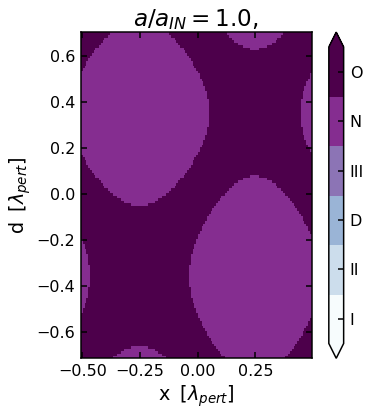

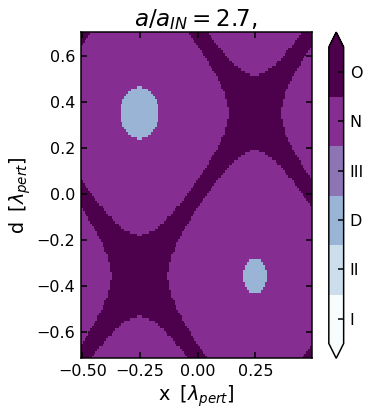

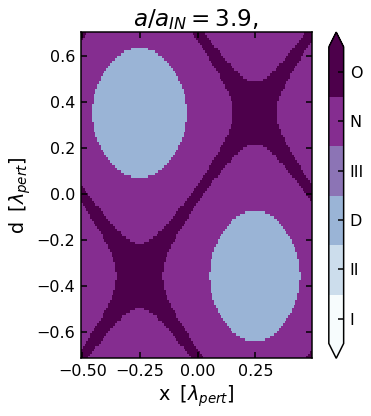

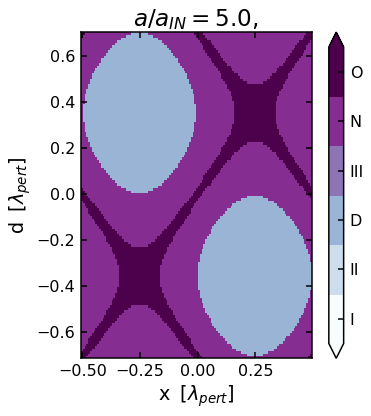

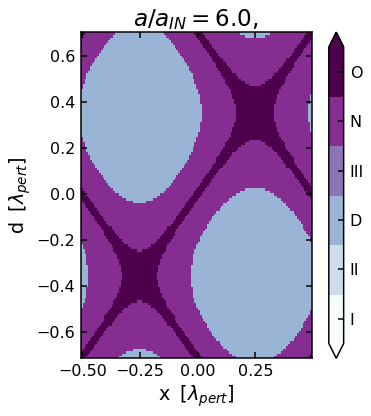

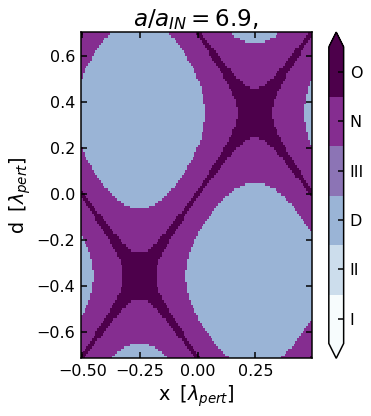

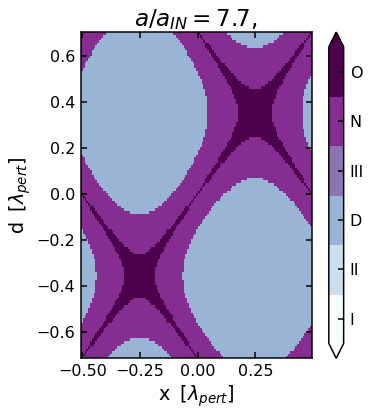

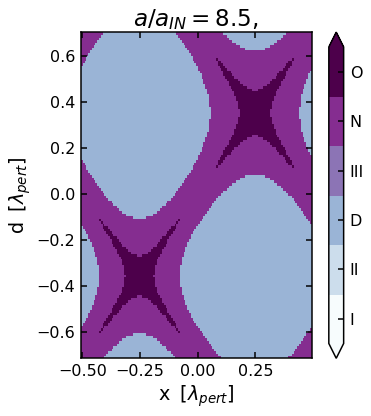

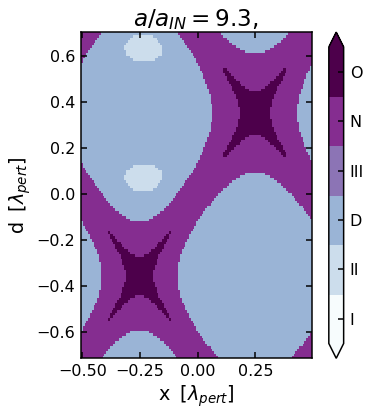

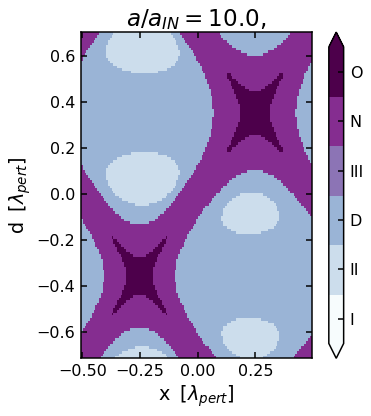

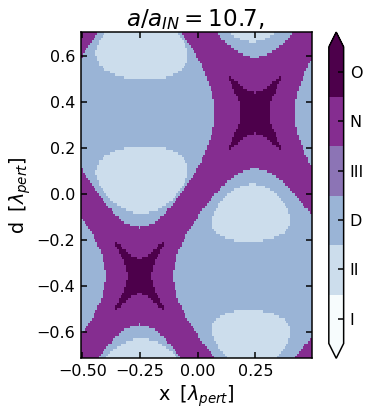

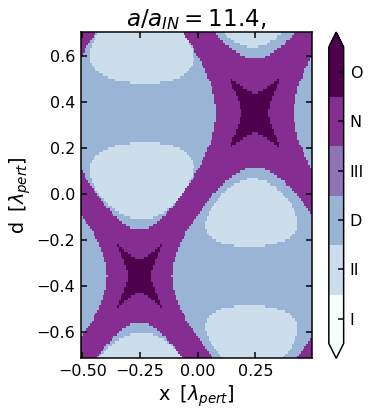

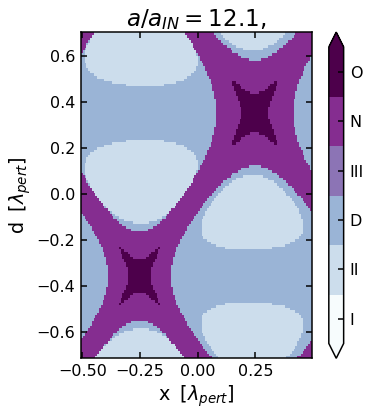

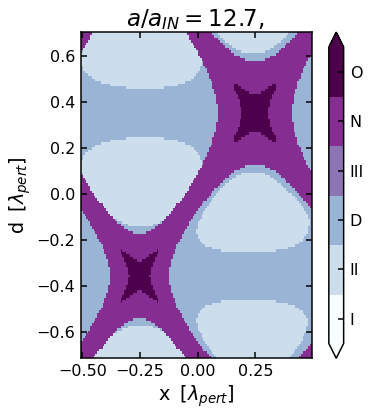

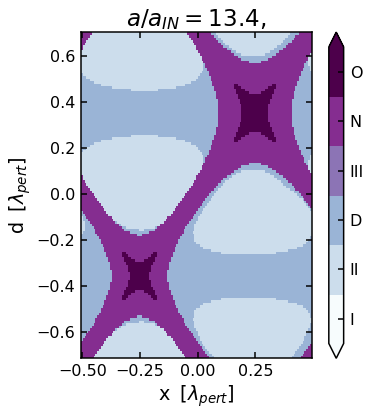

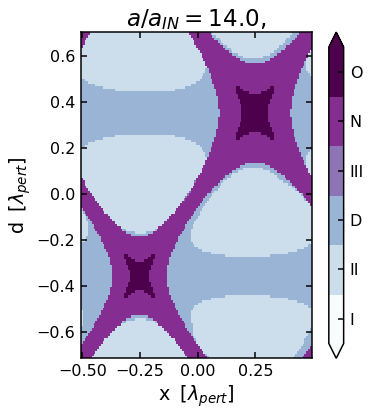

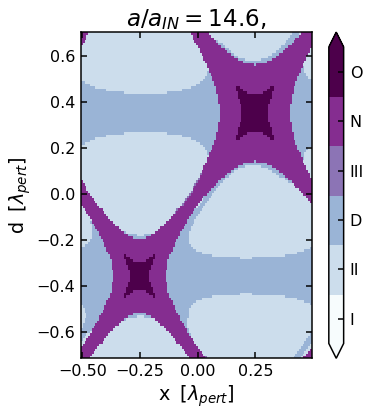

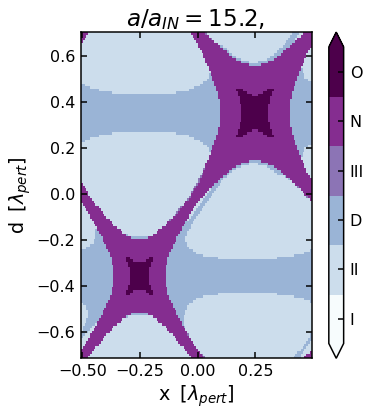

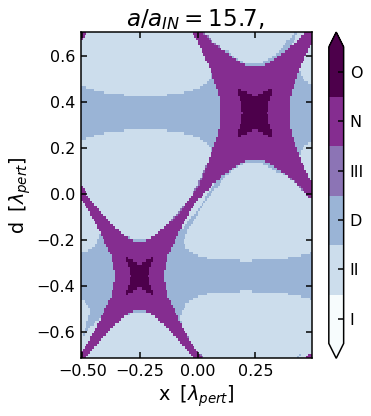

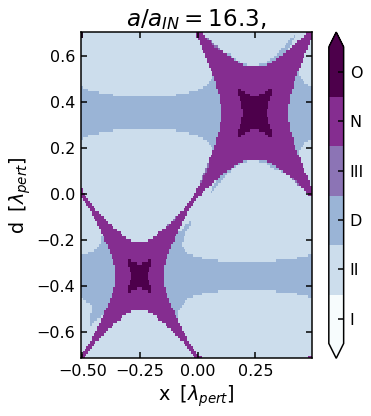

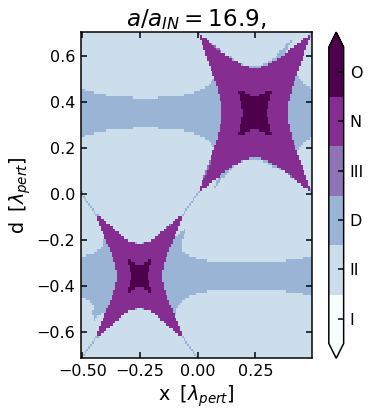

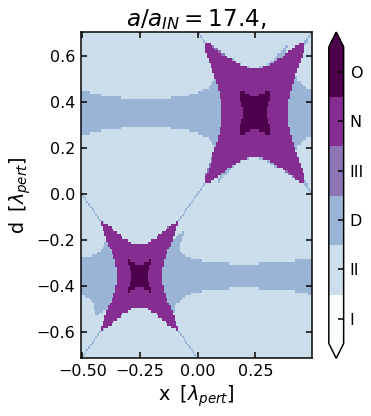

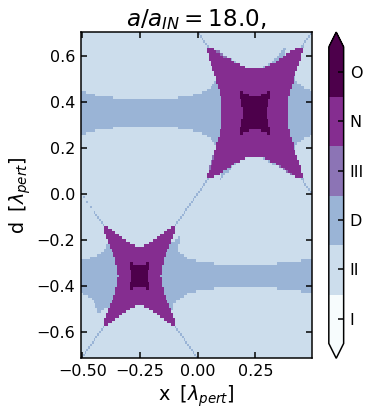

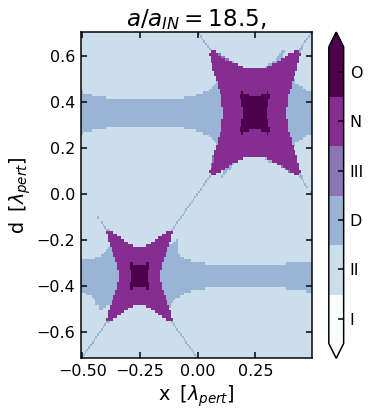

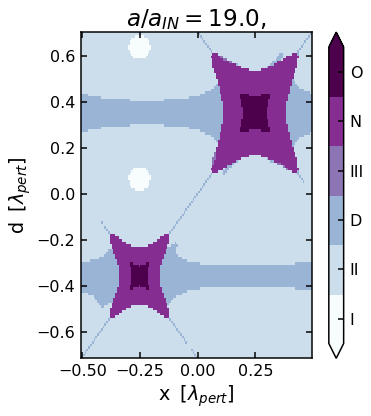

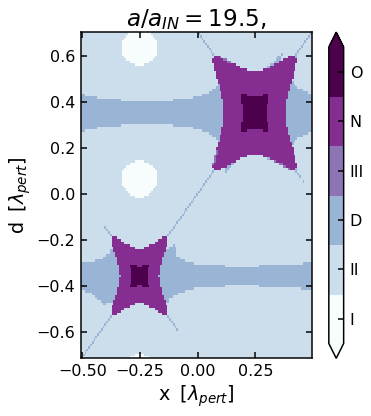

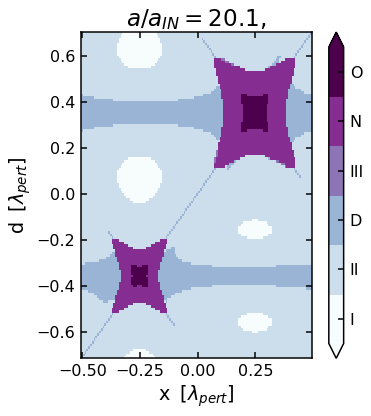

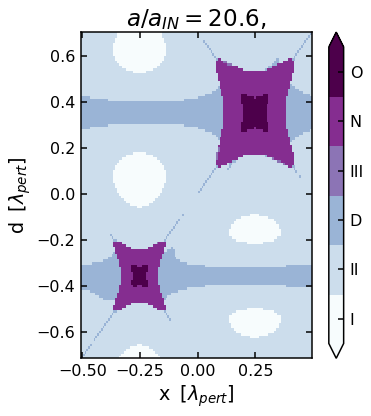

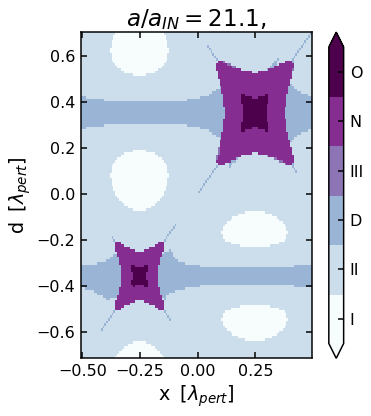

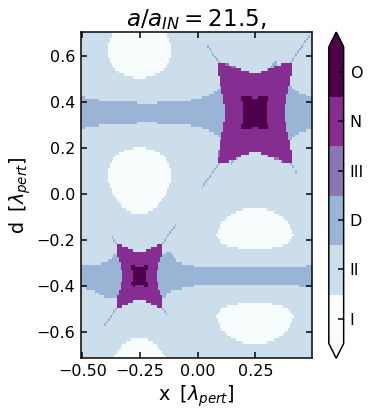

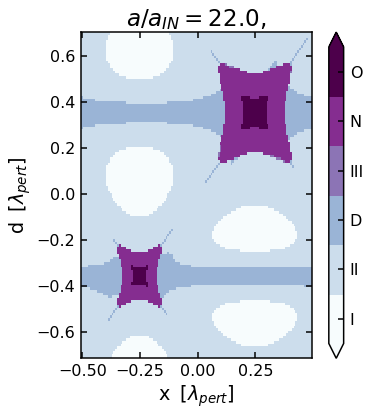

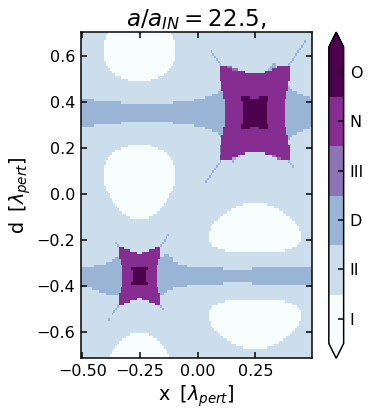

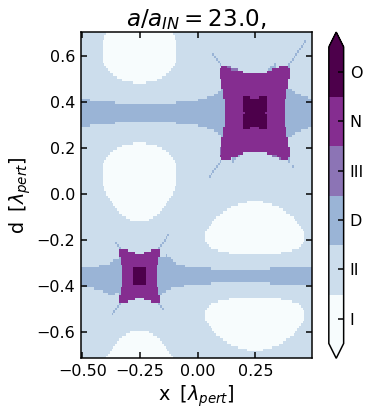

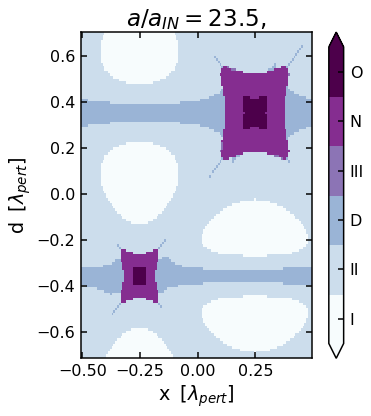

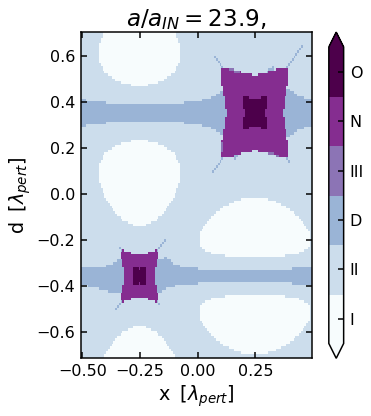

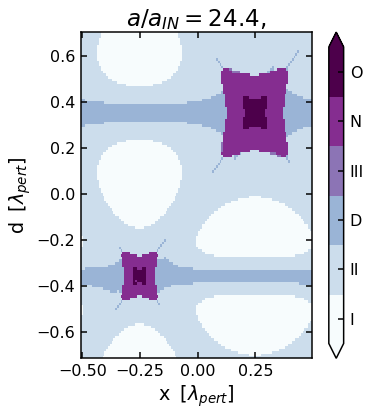

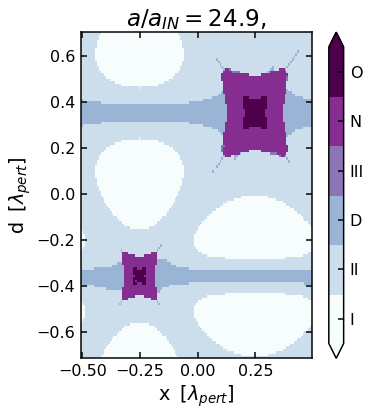

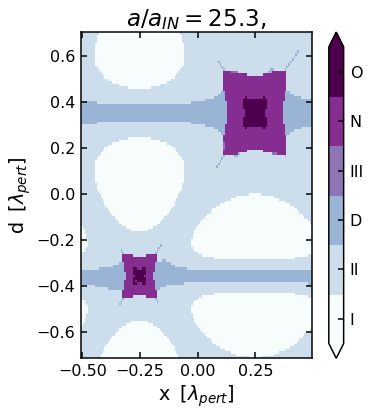

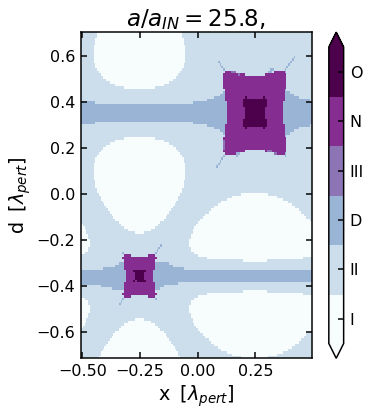

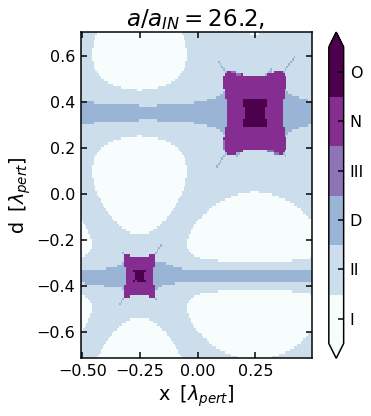

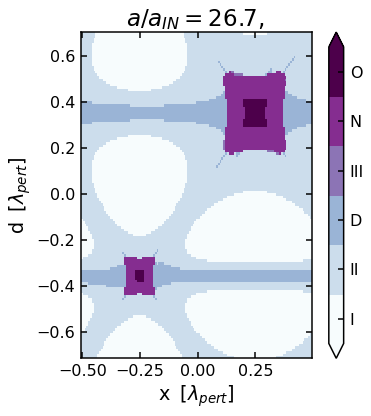

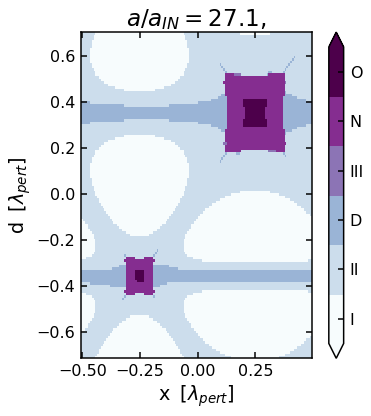

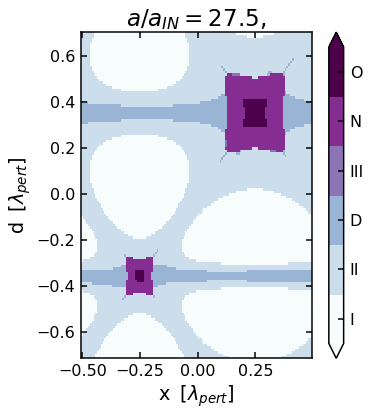

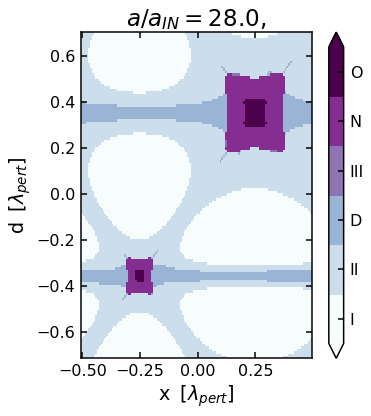

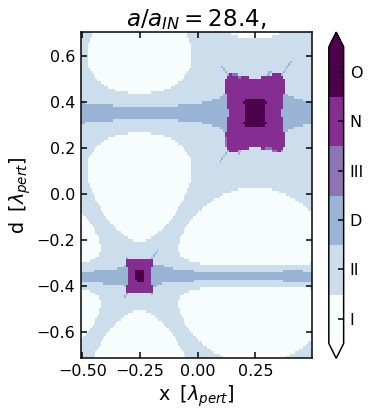

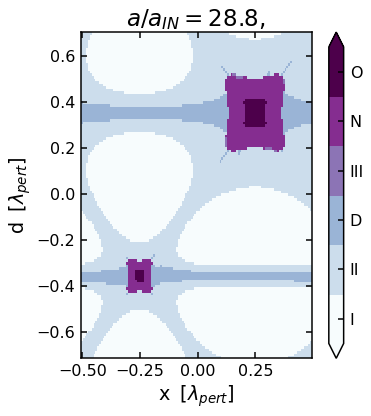

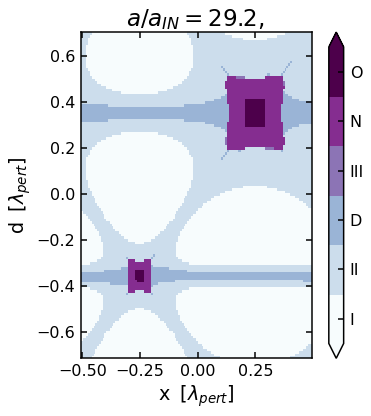

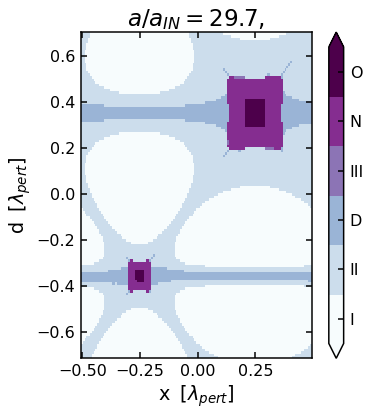

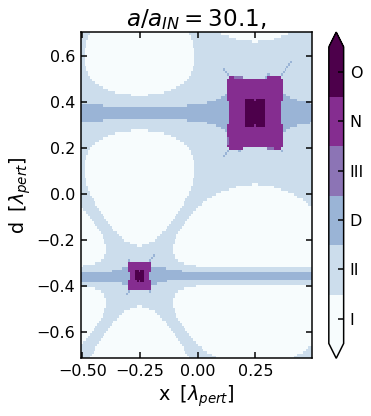

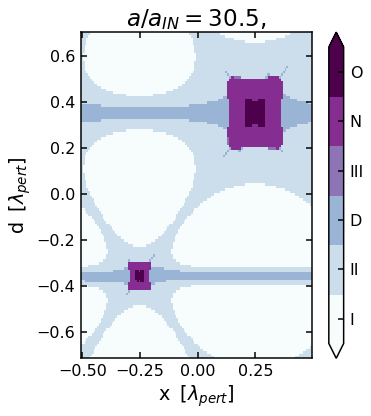

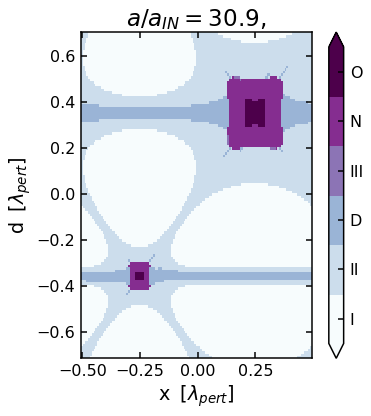

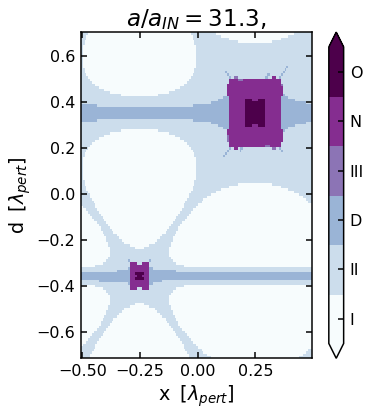

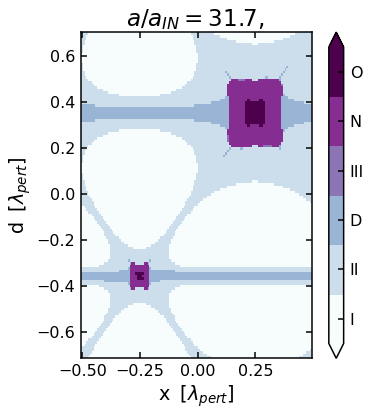

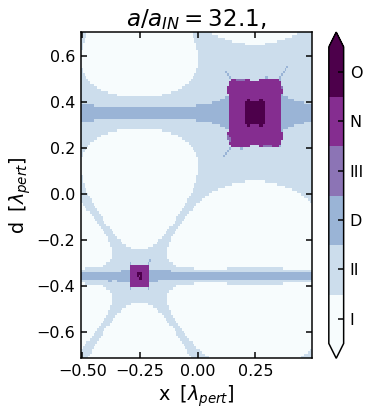

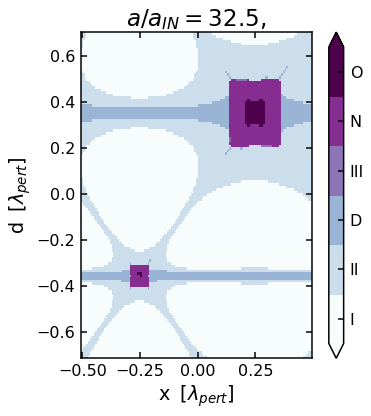

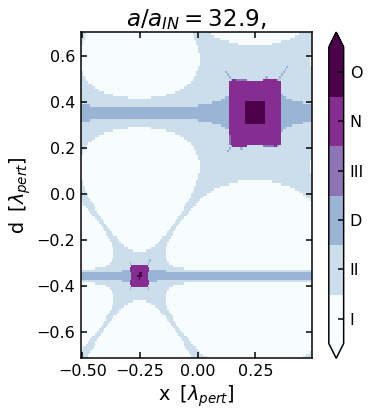

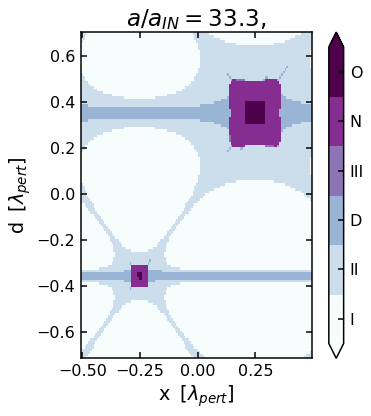

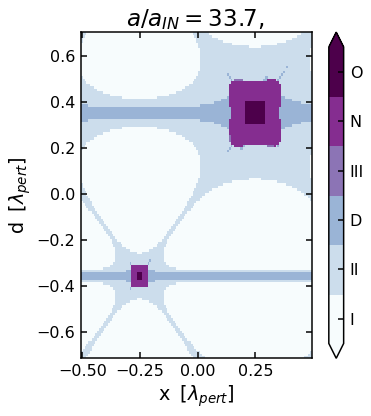

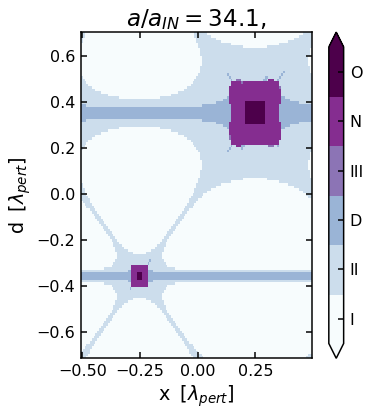

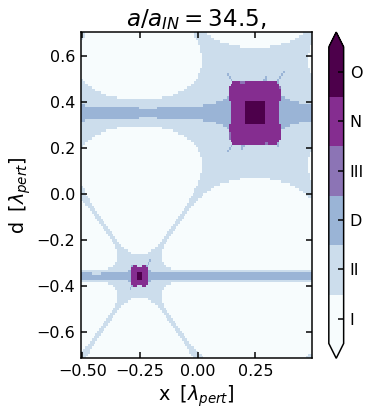

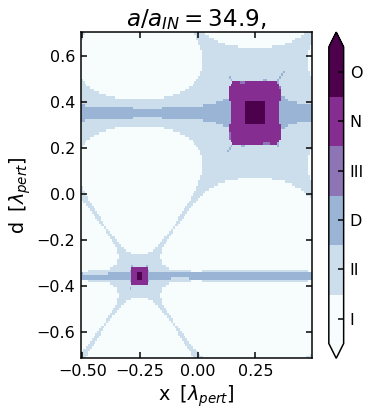

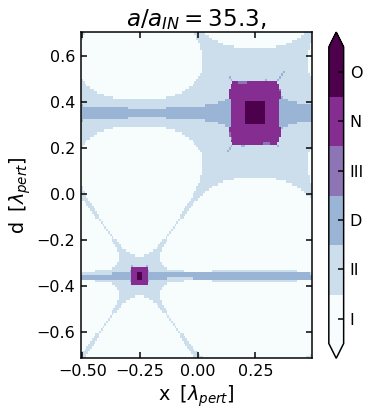

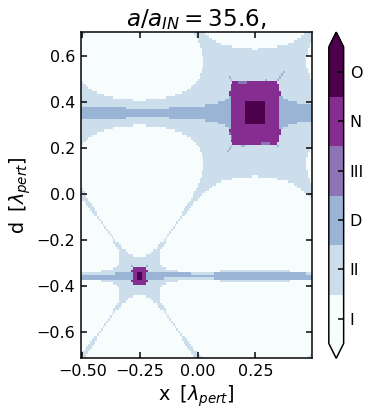

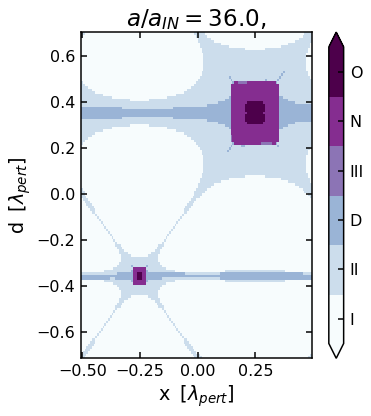

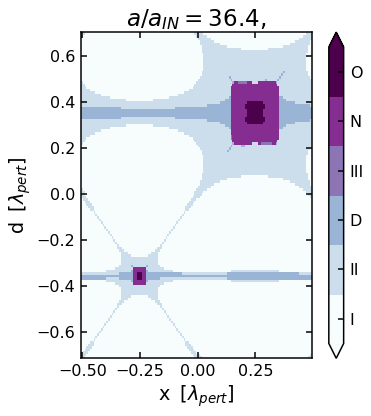

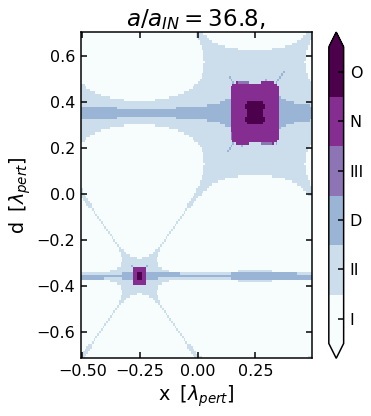

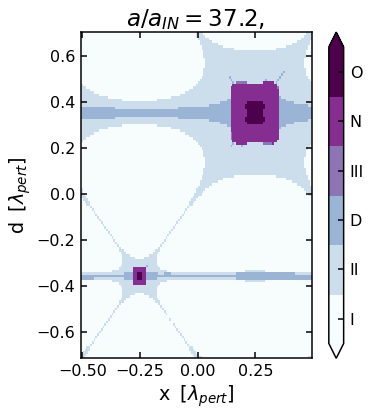

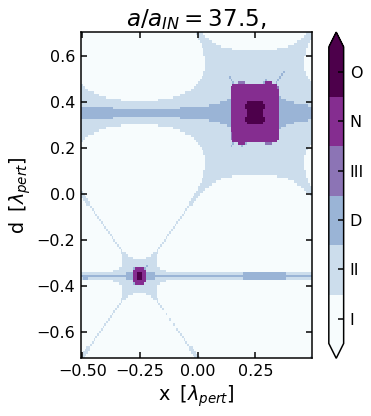

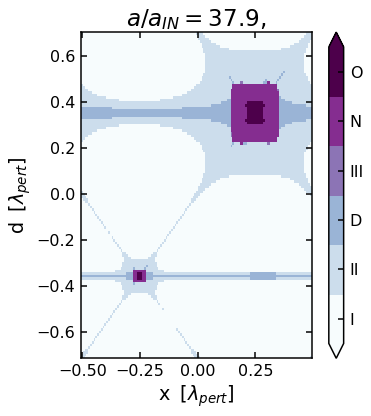

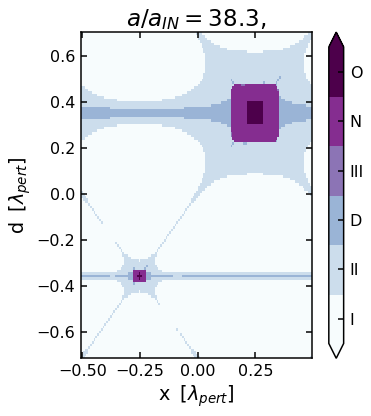

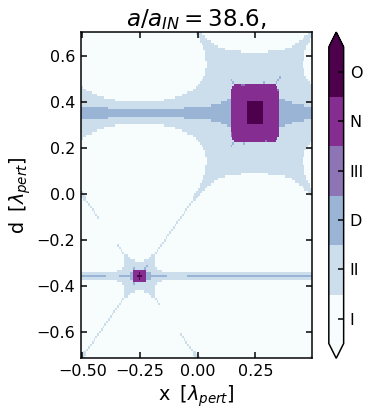

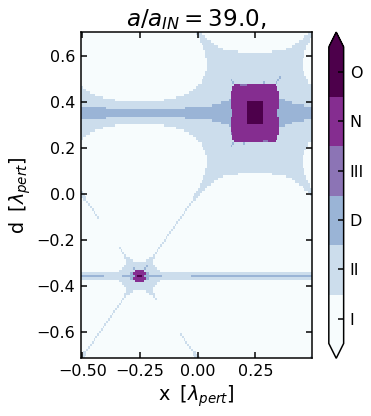

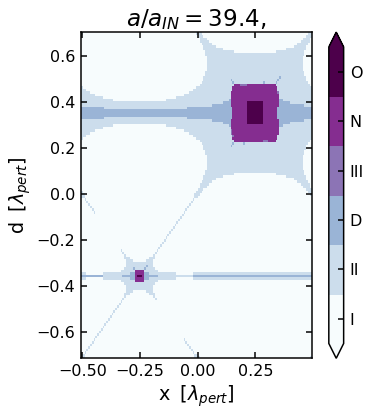

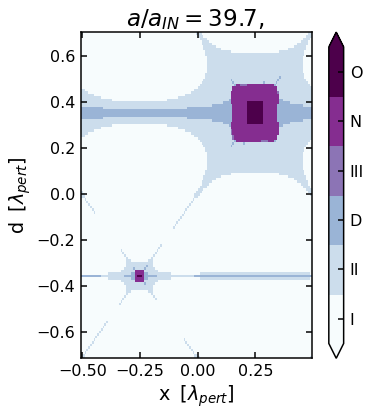

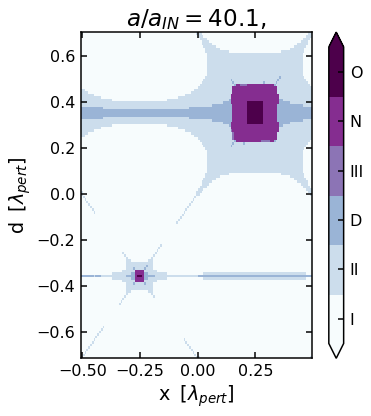

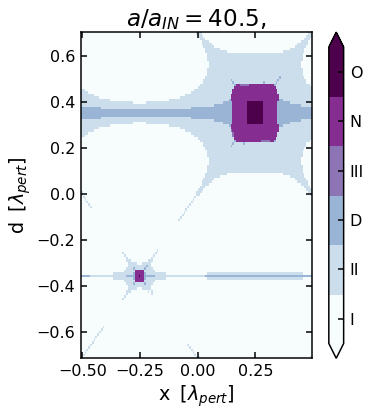

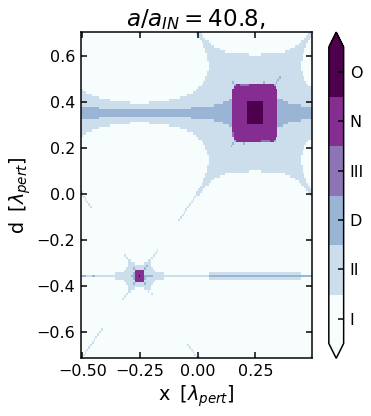

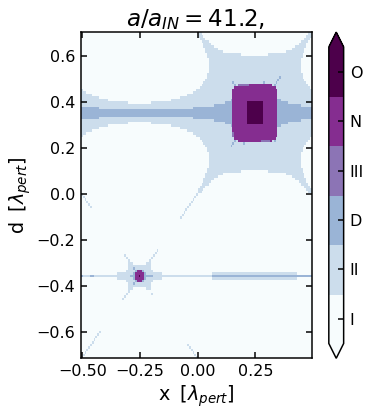

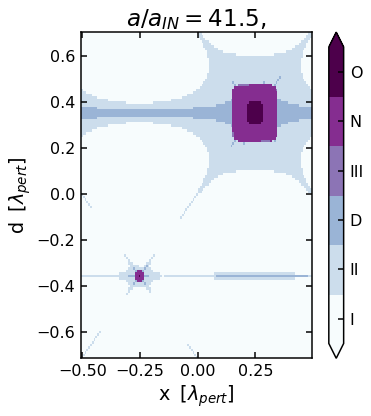

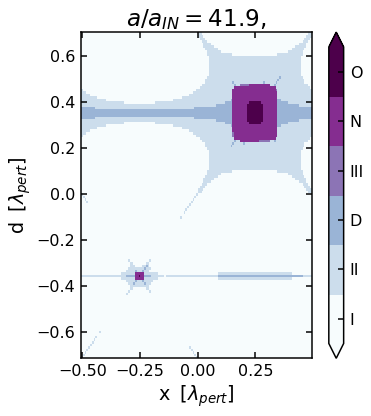

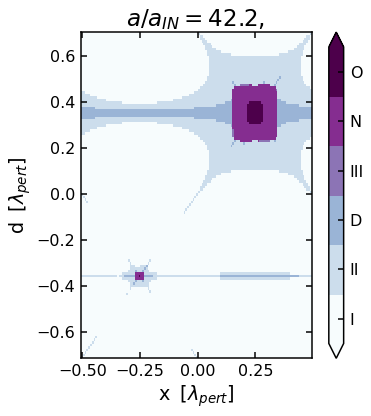

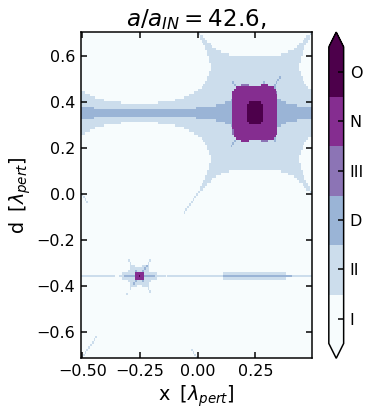

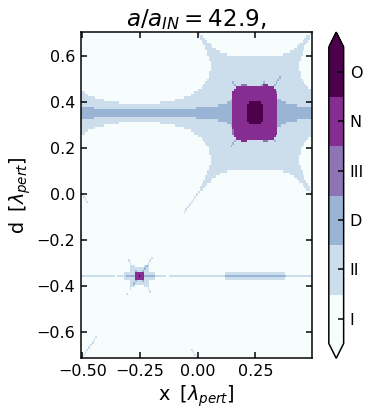

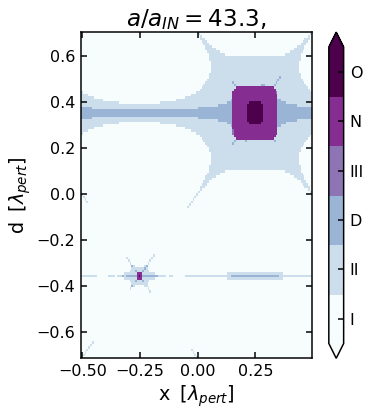

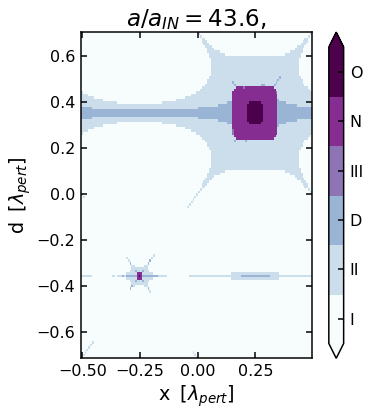

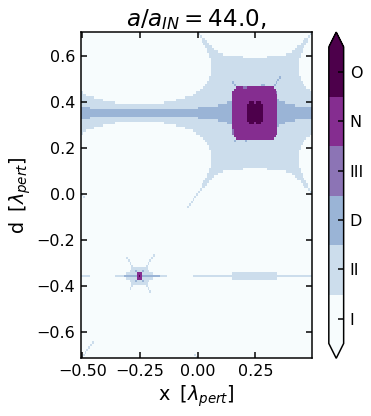

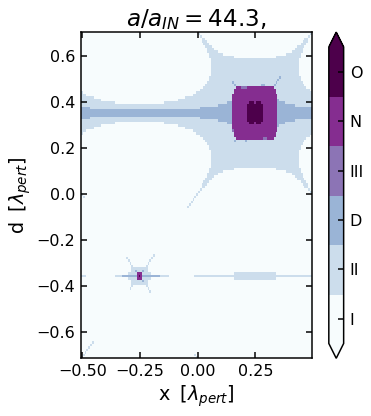

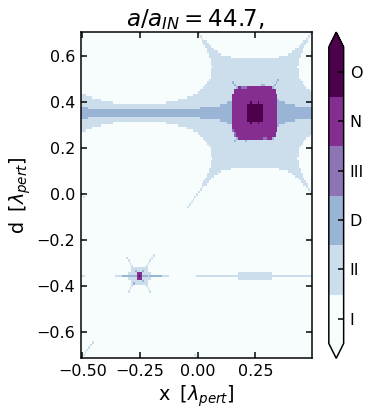

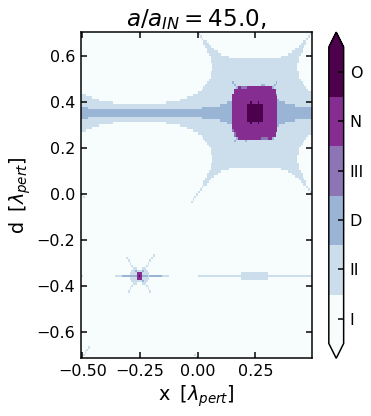

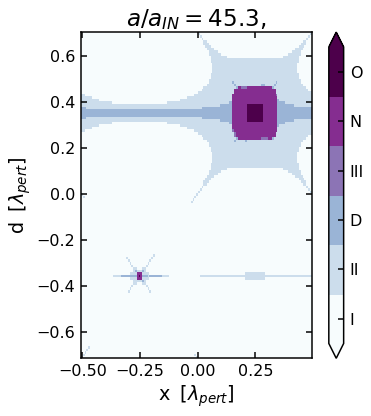

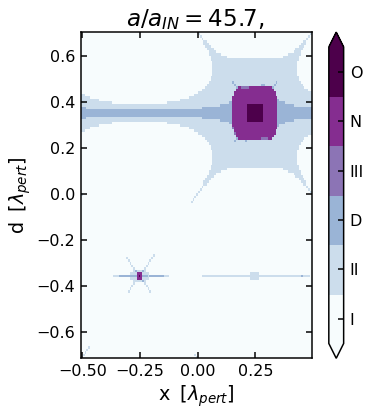

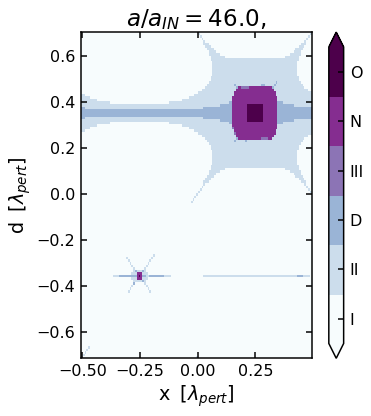

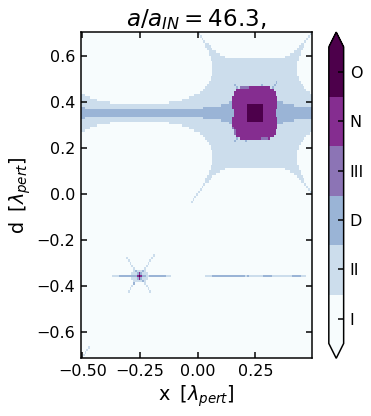

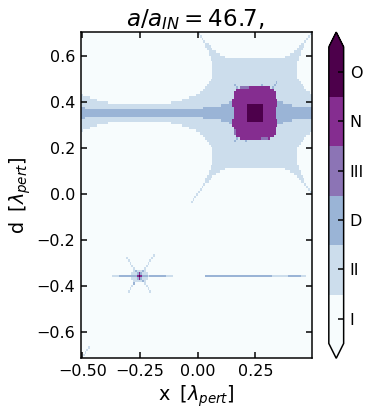

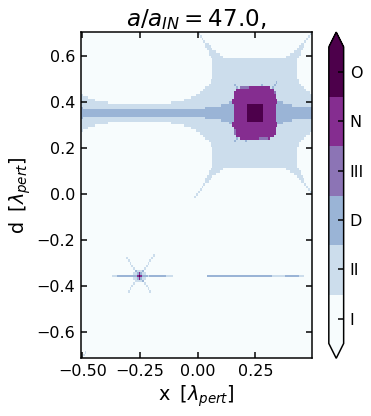

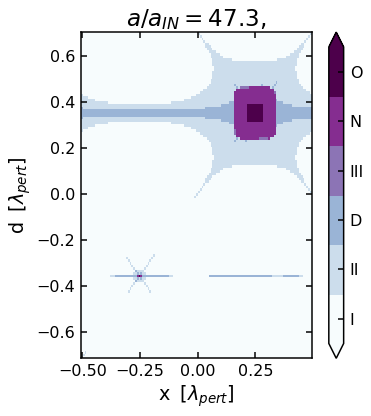

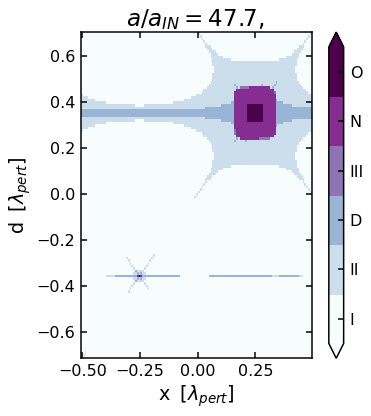

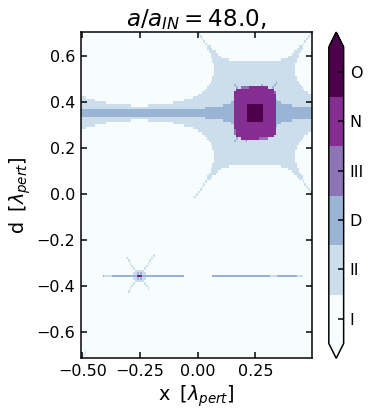

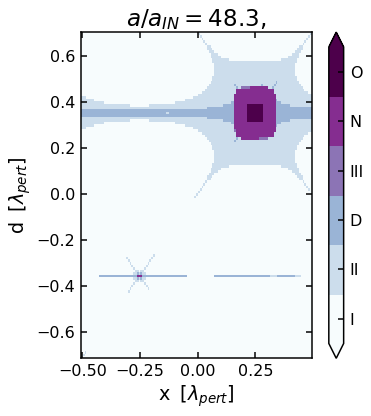

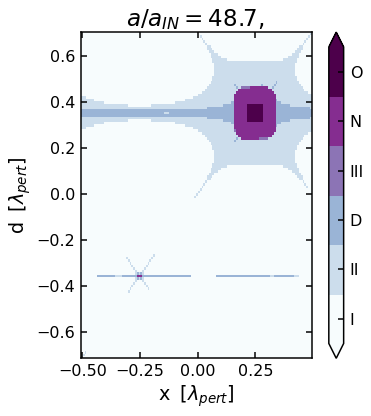

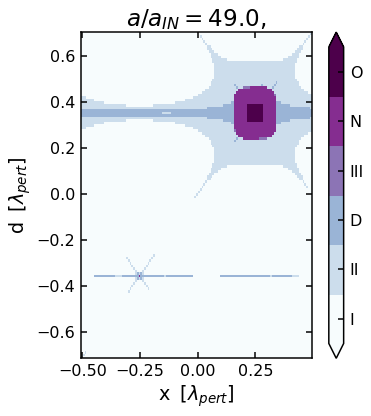

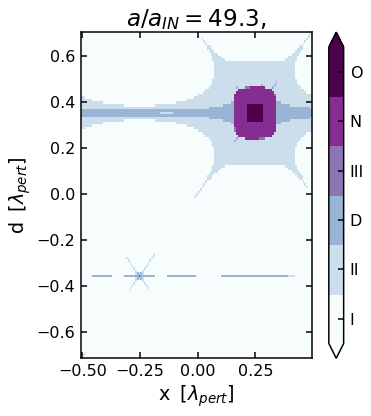

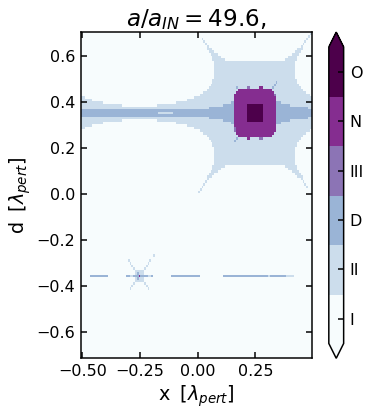

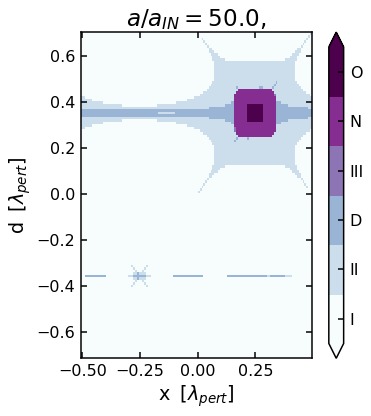

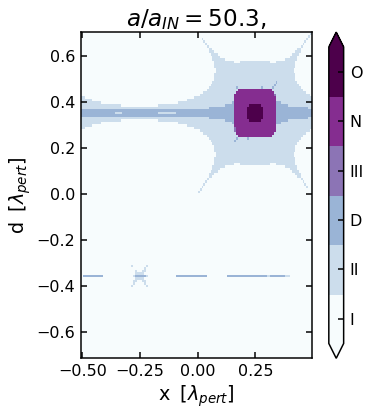

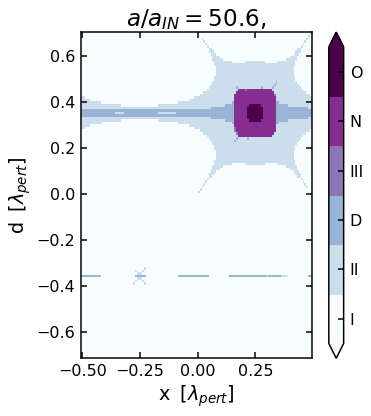

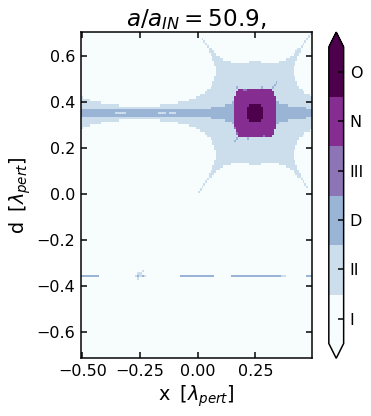

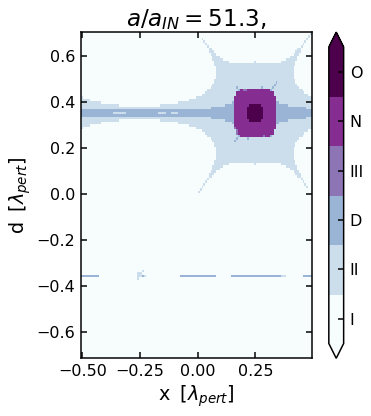

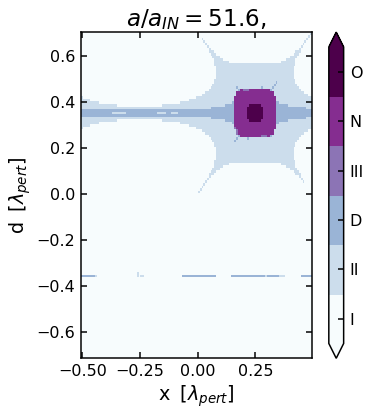

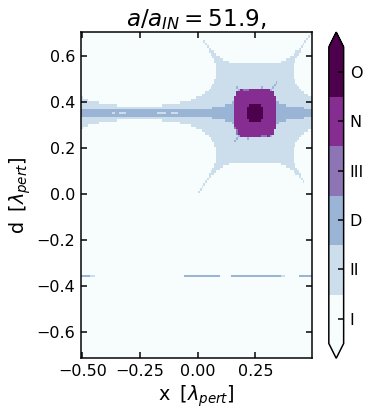

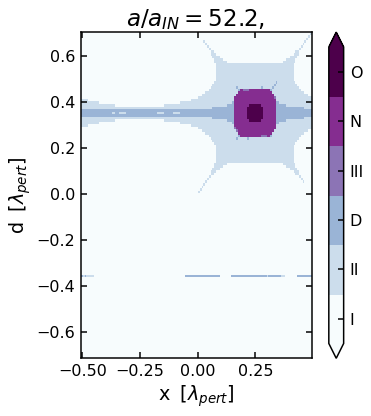

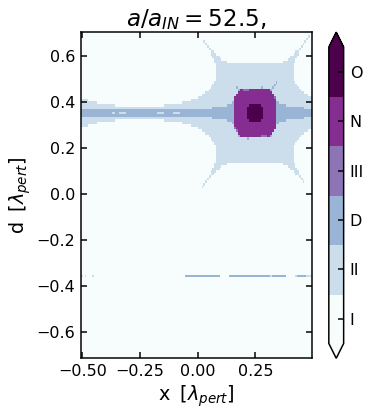

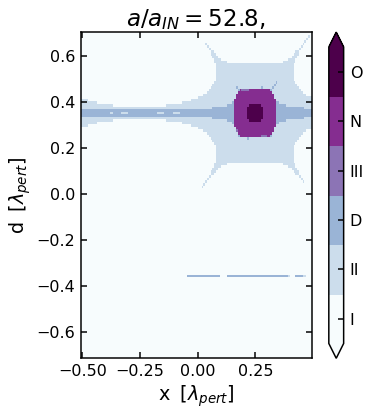

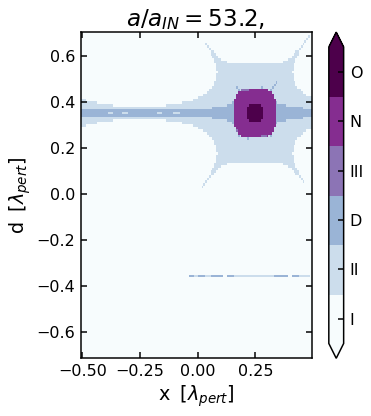

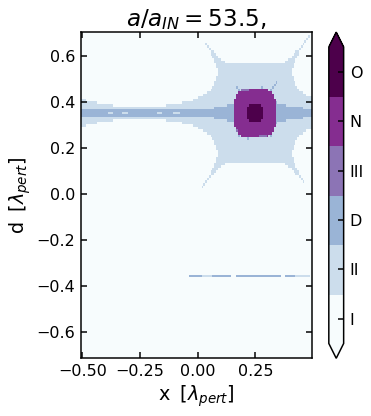

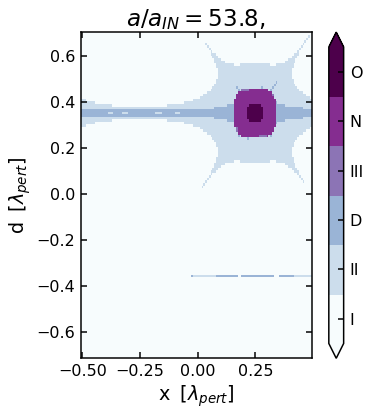

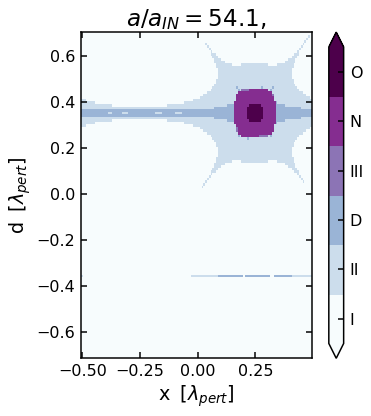

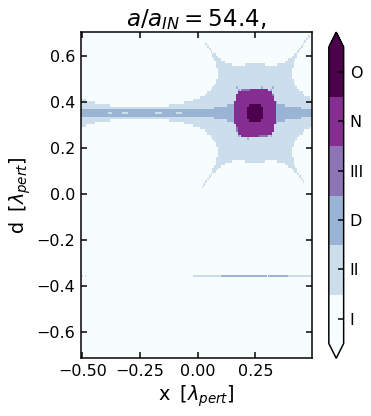

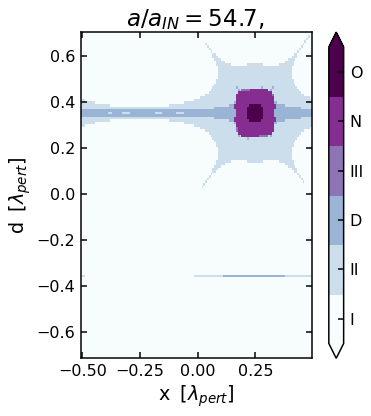

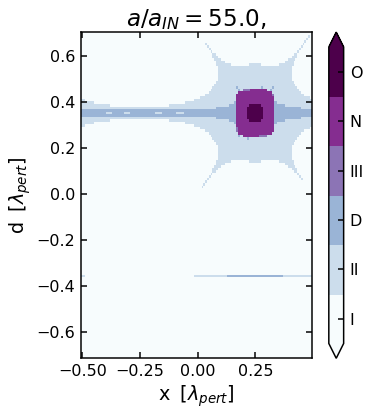

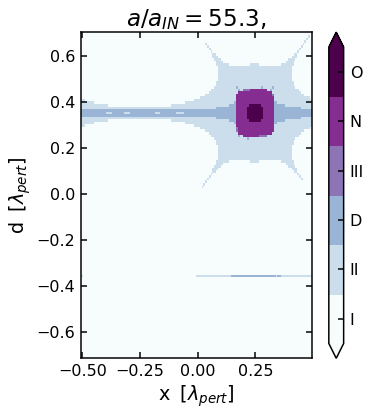

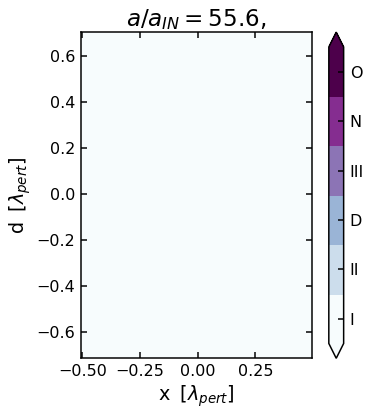

In [38]:
for it in range(len(it32)):
    Petrov_class = Petrov_determination(it)
                
    fig, ax = plt.subplots(figsize=(6,6))
    cmap = plt.cm.get_cmap('BuPu', 6)
    plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, Petrov_class, cmap=cmap, vmin=0.5, vmax=6.5, shading='nearest')
    plt.gca().set_aspect("equal")
    cbar = plt.colorbar(extend='both', ticks=[1, 2, 3, 4, 5, 6])
    cbar.ax.set_yticklabels(['I', 'II', 'D', 'III', 'N', 'O'])
    plt.title(r'$a/a_{IN}=$'+'{:.1f}, '.format(Lin128.temp_from_temp('an', 'it', it128[it])))#+r'$c=1e-$'+str(int(np.round(abs(np.log(cutoff)/np.log(10)), 1))))
    plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$')
    plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$')
    #plt.xlim(-0.5, 0)
    #plt.ylim(-0.7, 0)
    plt.savefig('/home/robynm/simulations/'+sim128.sim_name+'/plots/Petrov/Petrov_diag_it={:06d}.jpg'.format(it))

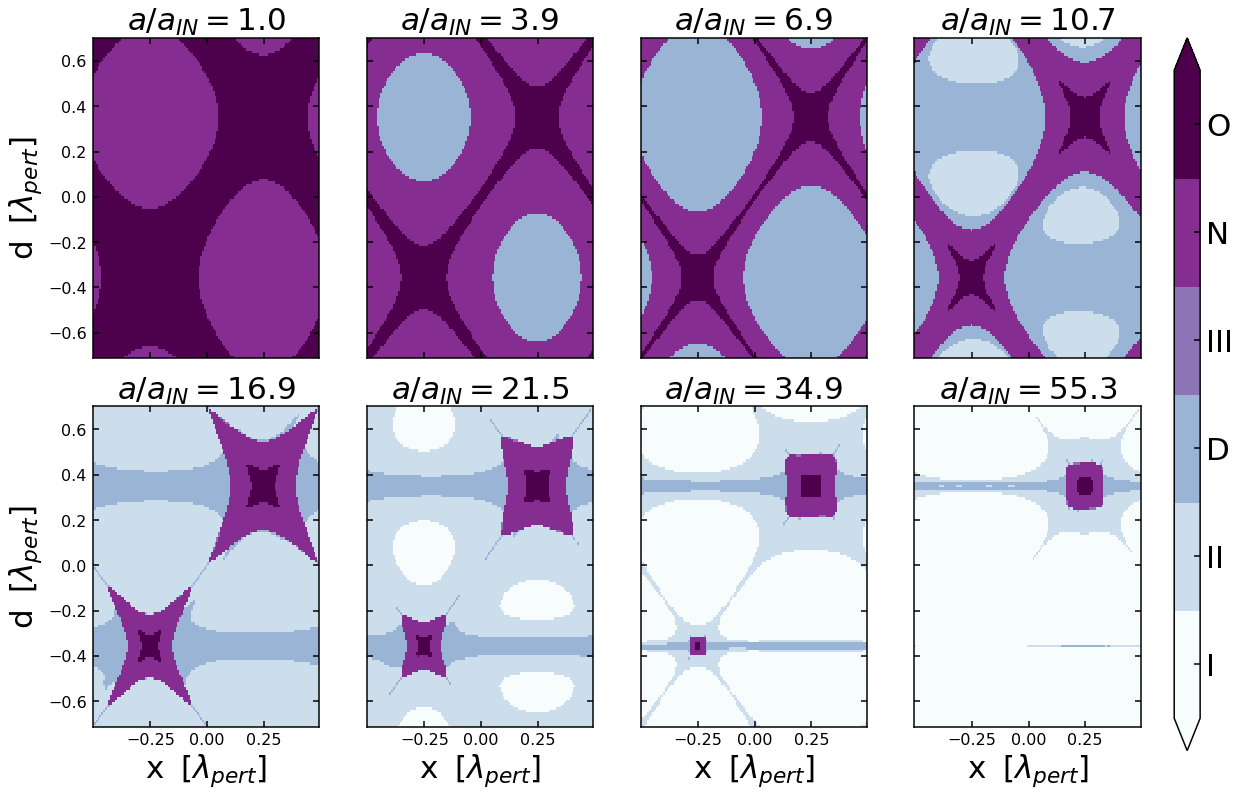

In [45]:
fig = plt.figure(figsize=(18, 11))
pltnbr = 1
nbrcolumns = 4
textsize=31
cmap = plt.cm.get_cmap('BuPu', 6)
for it in [0, 2, 5, 10, 20, 29, 60, 120]:
    Petrov_class = Petrov_determination(it)
    #Petrov_class = np.zeros((Lin128.N, Lin128.N))
    ax = plt.subplot(2,nbrcolumns,pltnbr)        
    cmap = plt.cm.get_cmap('BuPu', 6)
    im = plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, Petrov_class, cmap=cmap,linewidth=0,rasterized=True, vmin=0.5, vmax=6.5, shading='nearest')
    plt.gca().set_aspect("equal")
    
        
    plt.title(r'$a/a_{IN}=$'+'{:.1f}'.format(Lin128.temp_from_temp('an', 'it', it128[it])), fontsize=textsize)
    if pltnbr==1 or pltnbr==nbrcolumns+1:
        plt.ylabel('d'+r'$\;\;[\lambda_{pert}]$', size=textsize)
    else:
        ax.set_yticklabels(())
    ax.set_xticks([-0.25, 0, 0.25])
    if pltnbr<nbrcolumns+1:
        ax.set_xticklabels(())
    else:
        plt.xlabel('x'+r'$\;\;[\lambda_{pert}]$', size=textsize)
    pltnbr+=1
#fig.subplots_adjust(right=0.8, wspace=0.2, hspace=0.1)
fig.subplots_adjust(hspace=0.15, left=0.09, right=0.9 ,top=0.95,bottom=0.08)
cbar_ax = fig.add_axes([0.925, 0.05, 0.02, 0.9])
cbar = fig.colorbar(im, ticks=[1, 2, 3, 4, 5, 6], extend='both', cax=cbar_ax) 
cbar.ax.set_yticklabels(['I', 'II', 'D', 'III', 'N', 'O'], fontsize=textsize)
plt.savefig('/home/robynm/simulations/'+sim128.sim_name+'/plots/Petrov/Petrov_group.pdf')